# Descriptores para calculo de toxicidade ===> indice ToxCast

Descriptores já calculados e colocados na planilha

**teste com Feature Selection**

calculos para a tese

Ajustar config notebook para ...GPU 4  RAM alta


In [ ]:
!pip install tensorflow   # --upgrade tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
import sklearn

print(tf.__version__)

2.18.0


# **planilha com os descriptores "ToxCast_final2.csv"**

In [ ]:
# carregar matriz geral de dados
import io
import pandas as pd

from google.colab import files

uploaded = files.upload()

# Get the actual filename from the uploaded dictionary keys
filename = list(uploaded.keys())[0]  # Assuming only one file is uploaded

# Use the correct filename to read the CSV
data = pd.read_csv(io.BytesIO(uploaded[filename]), sep=";", decimal=",", header=0, encoding='latin1')

Saving ToxCast_final2.csv to ToxCast_final2.csv


In [ ]:
# matriz
data

,SMILES,ToxCast,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,...,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR
0,OCCOC(=O)C1=CC=CC=C1O,3,11.982304,-3.456758,11.982304,0.790156,0.669395,182.175,172.095,182.057909,...,4,2,4,5,0,0,0,1,0.5413,45.4751
1,C\C=C1\C(=O)C[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C...,31,14.063983,-5.377055,14.063983,2.223343,0.610442,312.453,284.229,312.208930,...,2,0,2,3,3,0,3,4,4.6436,90.8570
2,CC(CC1=CC=CC=C1)NCCCCl,0,8.339061,-4.159710,8.339061,0.964127,0.563849,211.736,193.592,211.112777,...,1,1,2,7,0,0,0,1,2.8361,62.9477
3,Cl.COC1=CC2=NC(=NC(N)=C2C=C1OC)N1CCN(CC1)C(=O)...,3,13.809505,-4.341167,13.809505,0.464390,0.788239,423.901,397.693,423.167332,...,8,1,10,7,0,2,2,4,1.4786,112.0694
4,ClC1CC2C(C1Cl)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl,35,8.780247,-3.182585,8.780247,0.535972,0.451292,409.782,403.734,405.797772,...,0,0,8,0,2,0,2,3,5.6828,81.2160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,CCCCCCCCNC,0,7.803614,-4.505425,7.803614,0.986281,0.540038,143.274,122.106,143.167400,...,1,1,1,9,0,0,0,0,2.5663,47.3027
8741,CCC1=CC(=C(O)C(=C1)C(C)(C)C)C(C)(C)C,16,8.586583,-4.521377,8.586583,1.969861,0.755501,234.383,208.175,234.198365,...,1,1,1,3,0,0,0,1,4.5496,74.8848
8742,OC(=O)C1=CC=CC(Cl)=C1Cl,0,11.053471,-1.180185,11.053471,0.307346,0.740184,191.013,186.981,189.958835,...,2,1,4,1,0,0,0,1,2.6916,43.4213
8743,ClCC=CCl,0,6.731481,-2.320602,6.731481,0.671296,0.453516,110.971,106.939,109.969005,...,0,0,2,1,0,0,0,0,1.9777,25.7130


# *Removendo linhas (celula em branco) onde não foi feito o calculo do descriptor (referencia coluna = BCUT2D_MWLOW)*

In [ ]:
df_remove = data.loc[data['BCUT2D_MWLOW'].isnull()]
data2 = data.drop(df_remove.index)
len(data2)

8138

In [ ]:
 X = data2.drop(['SMILES',	'ToxCast'], axis=1) # gerando a matriz X a partir da planilha

In [ ]:
print(X.shape)

(8138, 121)


# **Feature selection**

In [ ]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMRegressor

In [ ]:
feature_selection_estimator = LGBMRegressor()  # definir o estimador

In [ ]:
# Create a SelectFromModel object
selector = SelectFromModel(estimator=feature_selection_estimator, threshold='median')  # You can adjust the threshold as needed

The threshold parameter determines the criteria for feature selection. Here, 'median' selects features with importance weights greater than or equal to the median.

In [ ]:
# Fit the selector to your data
saida = data2['ToxCast']
selector.fit(X, saida)  # Assuming 'saida' is your target variable

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22711
[LightGBM] [Info] Number of data points in the train set: 8138, number of used features: 120
[LightGBM] [Info] Start training from score 8.656181


SelectFromModel(estimator=LGBMRegressor(), threshold='median')

In [ ]:
# Get the selected features:
selected_features = X.columns[selector.get_support()]

In [ ]:
#Create a new dataframe with only the selected features:
X_selected = X[selected_features]

In [ ]:
X_selected

,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,qed,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,...,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,FractionCSP3,MolLogP,MolMR
0,11.982304,-3.456758,0.790156,0.669395,0.341492,-0.507053,0.507053,0.341492,1.692308,2.538462,...,0.000000,11.982304,7.498674,-0.990134,-2.630252,-3.472814,0.000000,0.222222,0.5413,45.4751
1,14.063983,-5.377055,2.223343,0.610442,0.158918,-0.294866,0.294866,0.158918,1.304348,2.173913,...,0.000000,27.263015,0.000000,-14.777817,-21.014521,-4.490702,-34.263970,0.714286,4.6436,90.8570
2,8.339061,-4.159710,0.964127,0.563849,0.122471,-0.313884,0.313884,0.122471,1.714286,2.500000,...,5.240779,0.000000,-0.978239,-1.377667,-3.560619,-9.825228,-7.812846,0.500000,2.8361,62.9477
3,13.809505,-4.341167,0.464390,0.788239,0.251322,-0.492842,0.492842,0.251322,1.379310,2.137931,...,3.888889,19.600225,-0.970229,-1.584764,-8.026404,-2.559989,-12.191440,0.526316,1.4786,112.0694
4,8.780247,-3.182585,0.535972,0.451292,0.166392,-0.121375,0.166392,0.121375,1.055556,1.555556,...,49.623255,-5.131528,-7.118279,0.000000,-5.924491,0.000000,-3.182585,0.800000,5.6828,81.2160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,7.803614,-4.505425,0.986281,0.540038,0.121866,-0.319752,0.319752,0.121866,1.300000,2.100000,...,0.000000,0.000000,-0.986281,0.000000,0.000000,0.000000,-26.271743,1.000000,2.5663,47.3027
8741,8.586583,-4.521377,1.969861,0.755501,0.293124,-0.507341,0.507341,0.293124,1.176471,1.705882,...,0.000000,0.000000,4.221372,-15.292707,-2.090887,-4.007360,-4.125841,0.625000,4.5496,74.8848
8742,11.053471,-1.180185,0.307346,0.740184,0.336763,-0.477600,0.477600,0.336763,1.636364,2.363636,...,11.179267,11.053471,2.996564,-0.474383,-1.180185,-1.551253,0.000000,0.000000,2.6916,43.4213
8743,6.731481,-2.320602,0.671296,0.453516,0.075197,-0.122165,0.122165,0.075197,2.200000,2.800000,...,9.909344,0.000000,0.000000,-0.671296,-2.320602,-0.716821,0.000000,0.333333,1.9777,25.7130


In [ ]:
# autoescalonamento da matriz de entrada

import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
X2 = pd.DataFrame(scaler.fit_transform(X_selected))   # X

In [ ]:
saida = data2['ToxCast']   #separando a saida do modelo dos dados originais

In [ ]:
X2

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0.366708,0.344791,-0.195571,0.670894,0.731241,-0.639224,0.581123,0.917760,0.590381,0.728020,...,-0.427053,-0.019588,0.681960,0.498241,0.246599,0.234428,0.570216,-0.762604,-0.808176,-0.664683
1,1.172147,-0.934572,1.316357,0.357258,-0.921519,0.798656,-0.843830,-0.973998,-0.292322,0.089892,...,-0.427053,0.911060,-0.490883,-2.083521,-2.091332,0.089500,-1.014756,0.766341,0.993085,0.438736
2,-1.042930,-0.123538,-0.012042,0.109377,-1.251452,0.669782,-0.716114,-1.351641,0.640387,0.660694,...,0.621343,-0.749352,-0.643886,0.425675,0.128284,-0.670038,0.208812,0.100510,0.199438,-0.239853
3,1.073686,-0.244431,-0.539235,1.303163,-0.085030,-0.542926,0.485690,-0.016548,-0.121764,0.026907,...,0.350903,0.444370,-0.642633,0.386896,-0.439631,0.364398,0.006268,0.182279,-0.396621,0.954495
4,-0.872228,0.527454,-0.463720,-0.489443,-0.853855,1.974316,-1.706603,-1.362998,-0.858386,-0.992517,...,9.499868,-1.061879,-1.604230,0.683645,-0.172330,0.728893,0.422997,1.032674,1.449382,0.204324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8133,-1.250105,-0.353865,0.011329,-0.017302,-1.256927,0.630016,-0.676705,-1.357908,-0.302215,-0.039489,...,-0.427053,-0.749352,-0.645144,0.683645,0.581088,0.728893,-0.645054,1.654116,0.080972,-0.620247
8134,-0.947160,-0.364492,1.048949,1.128989,0.293391,-0.641175,0.583057,0.416595,-0.583274,-0.729376,...,-0.427053,-0.749352,0.169368,-2.179935,0.315190,0.158319,0.379364,0.488912,0.951811,0.050386
8135,0.007325,1.861516,-0.704908,1.047503,0.688426,-0.439639,0.383332,0.868754,0.463095,0.421995,...,1.809312,-0.076157,-0.022200,0.594816,0.431004,0.508023,0.570216,-1.453096,0.135990,-0.714619
8136,-1.664933,1.101734,-0.320961,-0.477613,-1.679401,1.968961,-2.003612,-1.841474,1.745506,1.185832,...,1.555269,-0.749352,-0.490883,0.557944,0.285977,0.626831,0.570216,-0.417359,-0.177473,-1.145180


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, saida, test_size=0.10, random_state=13)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.10, random_state=13)

# Modelo Keras Regressor

In [ ]:
# Define the Keras model

def create_keras_model(input_size, hidden_size1, hidden_size2, output_size, dropout_rate):
    inputs = Input(shape=(input_size,))
    x = Dense(hidden_size1, activation='relu')(inputs)
    x = Dense(hidden_size1, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(hidden_size2, activation='relu')(x)
    x = Dense(hidden_size2, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(output_size, activation='linear')(x) # Linear activation for regression
    model = Model(inputs=inputs, outputs=outputs)
    return model


In [ ]:
# Instantiate the model with your desired parameters

num_epochs = 300   #300
input_size = 63  # Number of columns in X
hidden_size1 = 512  # Choose an appropriate hidden size 512
hidden_size2 = 256   #256
output_size = 1   # Number of columns in Y
dropout_rate = 0.4  # 0.40538988141626064  # Adjust as needed
learning_rate = 1.2326476104043844e-05  # 0.0021304728112313516
batch_size = 32  #64

In [ ]:
# Instantiate the Keras model with the same parameters as the PyTorch model
keras_model = create_keras_model(input_size, hidden_size1, hidden_size2, output_size, dropout_rate)

# Compile the model
keras_model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate)) # MSE loss, Adam optimizer


# Ensure that X_train and y_train are NumPy arrays
X_train_values = X_train.values
y_train_values = y_train.values
X_validation_values = X_validation.values
y_validation_values = y_validation.values


In [ ]:
# Before model training, add these lines:
print("Shape of X_train_values:", X_train_values.shape)
print("Shape of y_train_values:", y_train_values.shape)
print("Shape of X_validation_values:", X_validation_values.shape)
print("Shape of y_validation_values:", y_validation_values.shape)

Shape of X_train_values: (6591, 63)
Shape of y_train_values: (6591,)
Shape of X_validation_values: (733, 63)
Shape of y_validation_values: (733,)


# Treinamento

In [ ]:
# Train the model

history = keras_model.fit(X_train_values, y_train_values, epochs=num_epochs, batch_size=batch_size, validation_data=(X_validation_values, y_validation_values))


Epoch 1/300
206/206 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 230.7959 - val_loss: 210.8796
Epoch 2/300
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 186.8736 - val_loss: 158.0005
Epoch 3/300
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 146.7715 - val_loss: 139.2926
Epoch 4/300
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 136.4775 - val_loss: 130.0547
Epoch 5/300
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 129.9485 - val_loss: 124.2925
Epoch 6/300
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 122.0882 - val_loss: 120.3209
Epoch 7/300
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 119.8930 - val_loss: 116.1915
Epoch 8/300
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 127.3734 - val_loss: 114.1225
Epoch 9/300
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 120.1349 - val_loss: 112.1412
Epoch 10/300
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 111.6779 - val_loss: 110.1318
Epoch 11/300
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 118.5326 - val_loss: 108.6

In [ ]:
# Assuming 'history' is the return value from keras_model.fit
train_losses = history.history['loss']
validation_losses = history.history['val_loss']

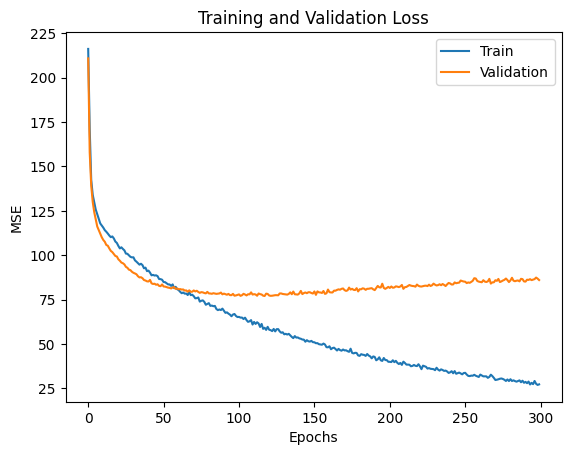

In [ ]:
# grafico dos resultados de treinamento
import matplotlib.pyplot as plt # Import the library

plt.plot(train_losses, label="Train")
plt.plot(validation_losses, label="Validation")
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# calculo das previsões

ypred = keras_model.predict(X_test) # Use Keras predict
ypredc = keras_model.predict(X_train) # Use Keras predict
ypredv = keras_model.predict(X_validation) # Use Keras predict

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


# Avaliação

In [ ]:
from sklearn.metrics import mean_squared_error
import math

mset = mean_squared_error(y_test, ypred)
rmset = math.sqrt(mset)

print("The mean squared error (MSE) on test set: {:.4f}".format(mset))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmset))

msec = mean_squared_error(y_train, ypredc)
rmsec = math.sqrt(msec)
print('\n')
print("The mean squared error (MSE) on training set: {:.4f}".format(msec))
print("The root mean squared error (RMSE) on training set: {:.4f}".format(rmsec))

msev = mean_squared_error(y_validation, ypredv)
rmsev = math.sqrt(msev)
print('\n')
print("The mean squared error (MSE) on validation set: {:.4f}".format(msev))
print("The root mean squared error (RMSE) on validation set: {:.4f}".format(rmsev))

The mean squared error (MSE) on test set: 75.9228
The root mean squared error (RMSE) on test set: 8.7134


The mean squared error (MSE) on training set: 18.8777
The root mean squared error (RMSE) on training set: 4.3449


The mean squared error (MSE) on validation set: 86.0443
The root mean squared error (RMSE) on validation set: 9.2760


In [ ]:
from sklearn.metrics import mean_absolute_error

maet = mean_absolute_error(y_test, ypred)
print("The mean absolute error (MSE) on test set: {:.4f}".format(maet))
maec = mean_absolute_error(y_train, ypredc)
print('\n')
print("The mean absolute error (MSE) on training set: {:.4f}".format(maec))
maev = mean_absolute_error(y_validation, ypredv)
print('\n')
print("The mean absolute error (MSE) on validation set: {:.4f}".format(maev))

The mean absolute error (MSE) on test set: 5.2362


The mean absolute error (MSE) on training set: 2.7990


The mean absolute error (MSE) on validation set: 5.5260


In [ ]:
from sklearn.metrics import r2_score
# avaliação do conj teste
test_r2 = r2_score(y_test, ypred)
print('Reg linear coef R2 teste: ', test_r2)
print('\n')

# avaliação do conj validação
val_r2 = r2_score(y_validation, ypredv)
print('Reg linear coef R2 validação: ', val_r2)
print('\n')

# avaliação do conj calibração
cal_r2 = r2_score(y_train, ypredc)
print('Reg linear coef R2 calibração: ', cal_r2)

Reg linear coef R2 teste:  0.4612072706222534


Reg linear coef R2 validação:  0.47387784719467163


Reg linear coef R2 calibração:  0.8798680901527405


Text(0.5, 0, 'y experimental')

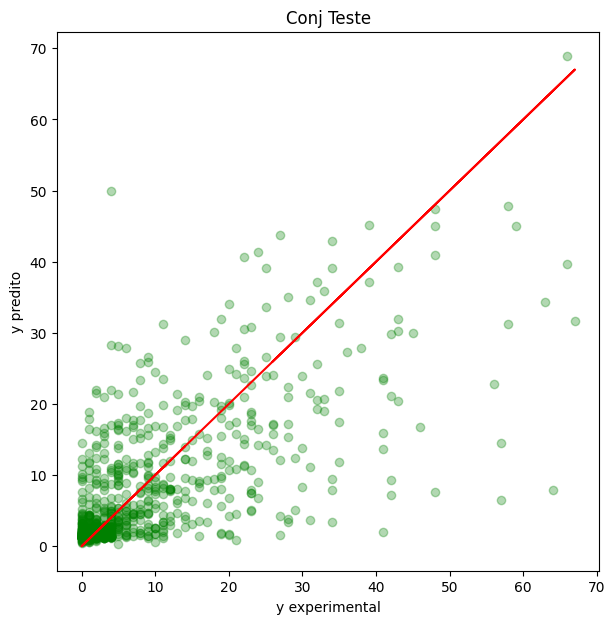

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7, 7))  # tamanho do gráfico
plt.scatter(x=y_test, y=ypred, c='green' ,alpha=0.3) # dispersão dos dados

z = np.polyfit(y_test, y_test, 1)  #linha vermelha de referência - parte 1
p = np.poly1d(z)  # equação da linha - parte 2

plt.plot(y_test, p(y_test), 'red')  # cor da linha e geraçao da mesma
plt.title('Conj Teste')
plt.ylabel('y predito')
plt.xlabel('y experimental')

Text(0.5, 0, 'y experimental')

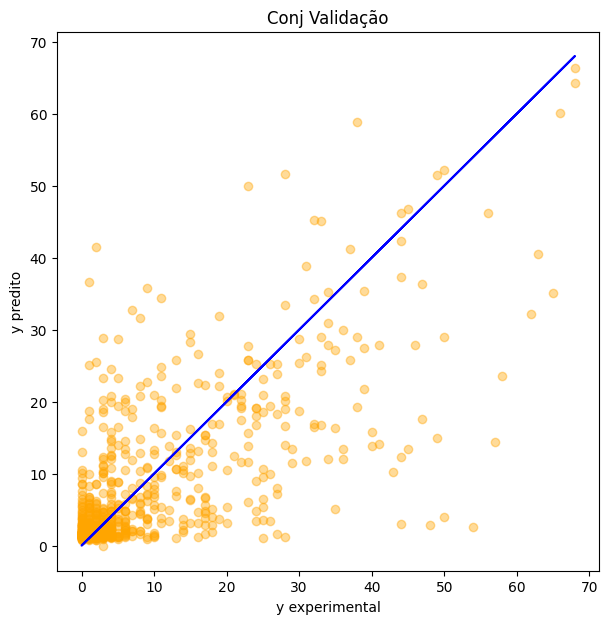

In [ ]:
plt.figure(figsize=(7, 7))  # tamanho do gráfico
plt.scatter(x=y_validation, y=ypredv, c='orange' ,alpha=0.4) # dispersão dos dados

z = np.polyfit(y_validation, y_validation, 1)  #linha vermelha de referência - parte 1
p = np.poly1d(z)  # equação da linha - parte 2

plt.plot(y_validation, p(y_validation), 'blue')  # cor da linha e geraçao da mesma
plt.title('Conj Validação')
plt.ylabel('y predito')
plt.xlabel('y experimental')

Text(0.5, 0, 'y experimental')

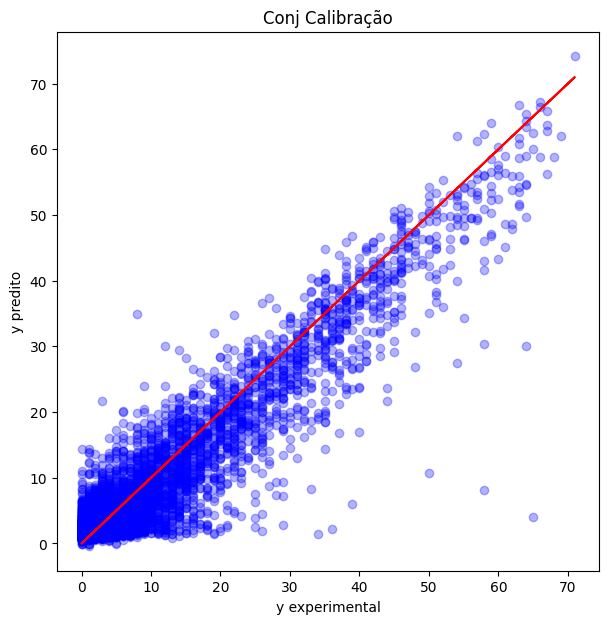

In [ ]:
plt.figure(figsize=(7, 7))  # tamanho do gráfico
plt.scatter(x=y_train, y=ypredc, c='blue' ,alpha=0.3) # dispersão dos dados

z = np.polyfit(y_train, y_train, 1)  #linha vermelha de referência - parte 1
p = np.poly1d(z)  # equação da linha - parte 2

plt.plot(y_train, p(y_train), 'red')  # cor da linha e geraçao da mesma
plt.title('Conj Calibração')
plt.ylabel('y predito')
plt.xlabel('y experimental')